# Boston housing


## Etapa1
* Entendimento do negocio nessa etapas:
1. Objetivos do projeto.
2. Critérios de sucesso.
3. Recursos e continjenciamento.
4. planejamento estrutural.


## Etapa2
* Entendimento dos dados nessa etapa será feitoos seguintes procedimentos:
1. Coleta.
2. Descrição.
3. Explotação.
4. Verificação da qualidade.

In [92]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Dicionário dos dados

| Variável | Definição | Tipo de variável |
|---|---|---|
| CRIM | taxa per capita por cidade | |
| ZN | proporção de residencial para terrenos zoneados para lotes com mais de 25.000 pés quadrados | Qualitativa ordinal |
| INDUS | proporção de acres comerciais não varejistas por cidade | male ou female |
| CHAS | variável dummy charles rives (=1 se o trato limita o rio, o caso contrário) | |
| NOX | concentração de óxidos de nitrogênio (partes por 10 milhões) | |
| RM | número médio de quartos por habitação | |
| AGE | proporção de unidades ocupadas pelos proprietários construídas antes de 1940 | | 
| DIS | média ponderada das distâncias até cinco centros de emprego de Boston | |
| RAD | índice de acessibilidade às rodovias radiais |  |
| TAX | taxa de imposto sobre a propriedade de valor total por 10.000 |  |
| PTRATIO | proporção aluno-professor por cidade |  |
| B | 1000 (Bk - 0,63) ^ onde Bk é a proporção de negros por cidade |  |
| LSTAT | status mais baixo da população (porcentagem) |  |
| MEDV | valor médio das casas ocupadas pelos proprietários em US$ 1.000 (variável alvo) |  |

In [93]:
train = pd.read_csv('./hmboost/train.csv', index_col=0)

test = pd.read_csv('./hmboost/test.csv', index_col=0)

train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
1,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1
2,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3
3,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
4,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
400,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24,19.4
401,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51,23.3
402,5.29305,0.0,18.10,0.0,0.700,6.051,82.5,2.1678,24.0,666.0,20.2,378.38,18.76,23.2


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(13)
memory usage: 11.2 KB


In [96]:
train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

* Não temos nenhum valor faltanto nos dados estão não será preciso efetuar nenhuma limpeza dos dados.

In [97]:
from ydata_profiling import ProfileReport

if not os.path.exists("relatorio.html"):

    relatorio = ProfileReport(train)
    relatorio.to_file('relatorio.html')

<Axes: >

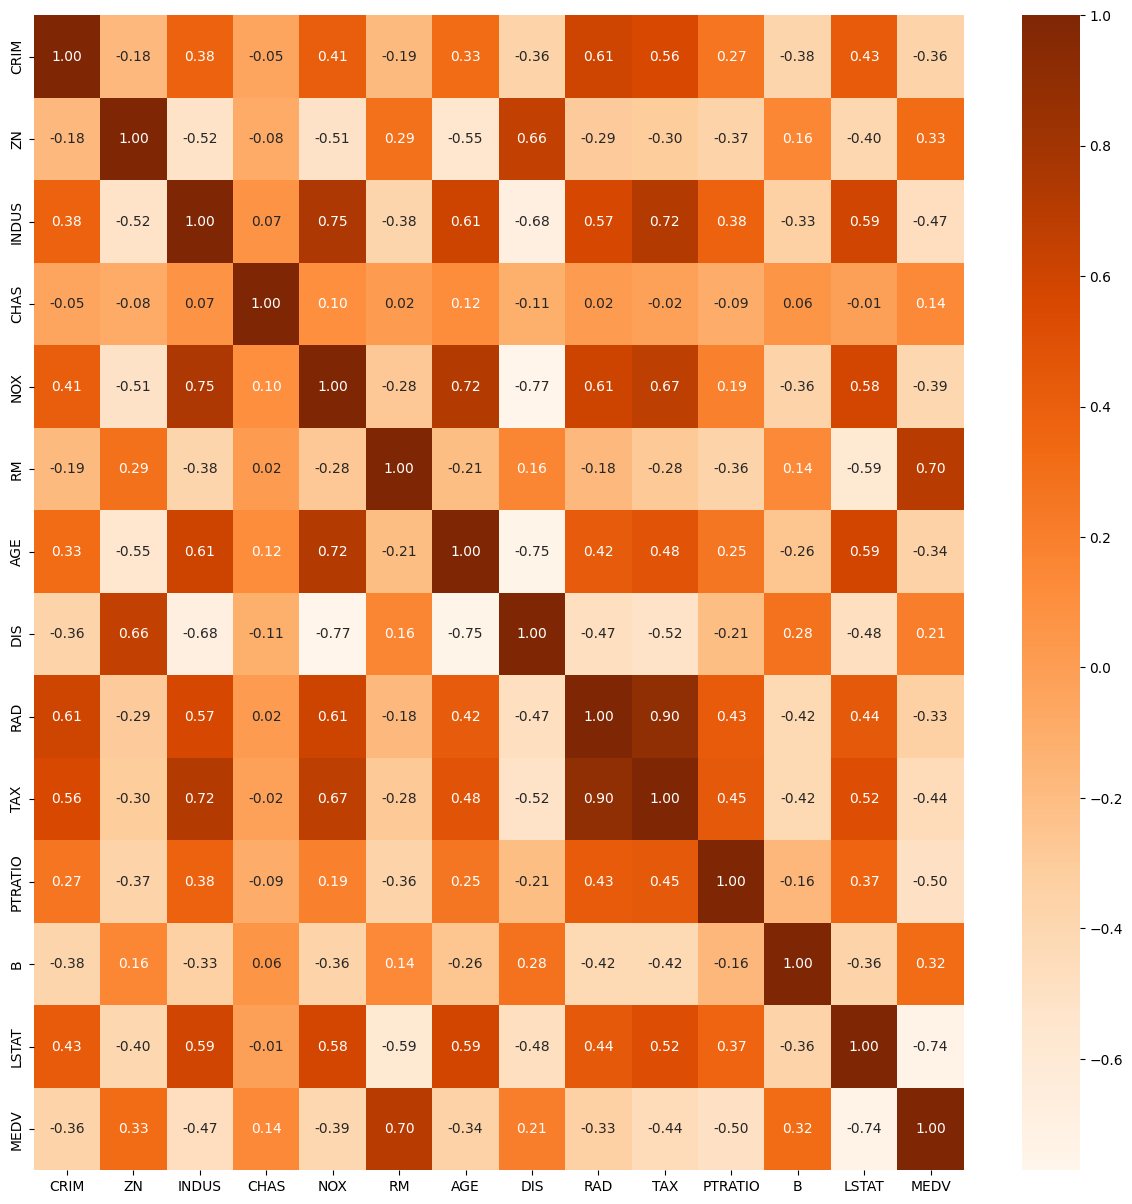

In [98]:

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap='Oranges', fmt='.2f')

<Axes: >

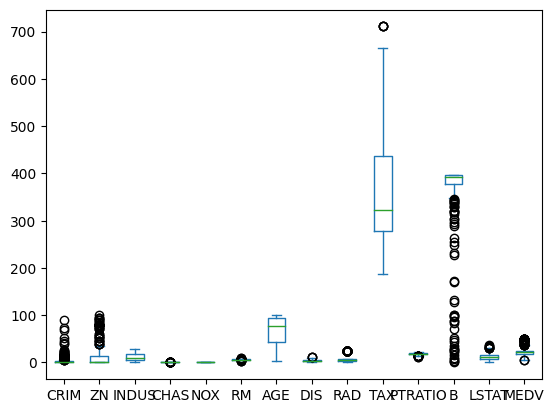

In [99]:
train[list(train.columns)].plot.box()

* A função abaixo foi feita com auxilio do chatgpt3.5

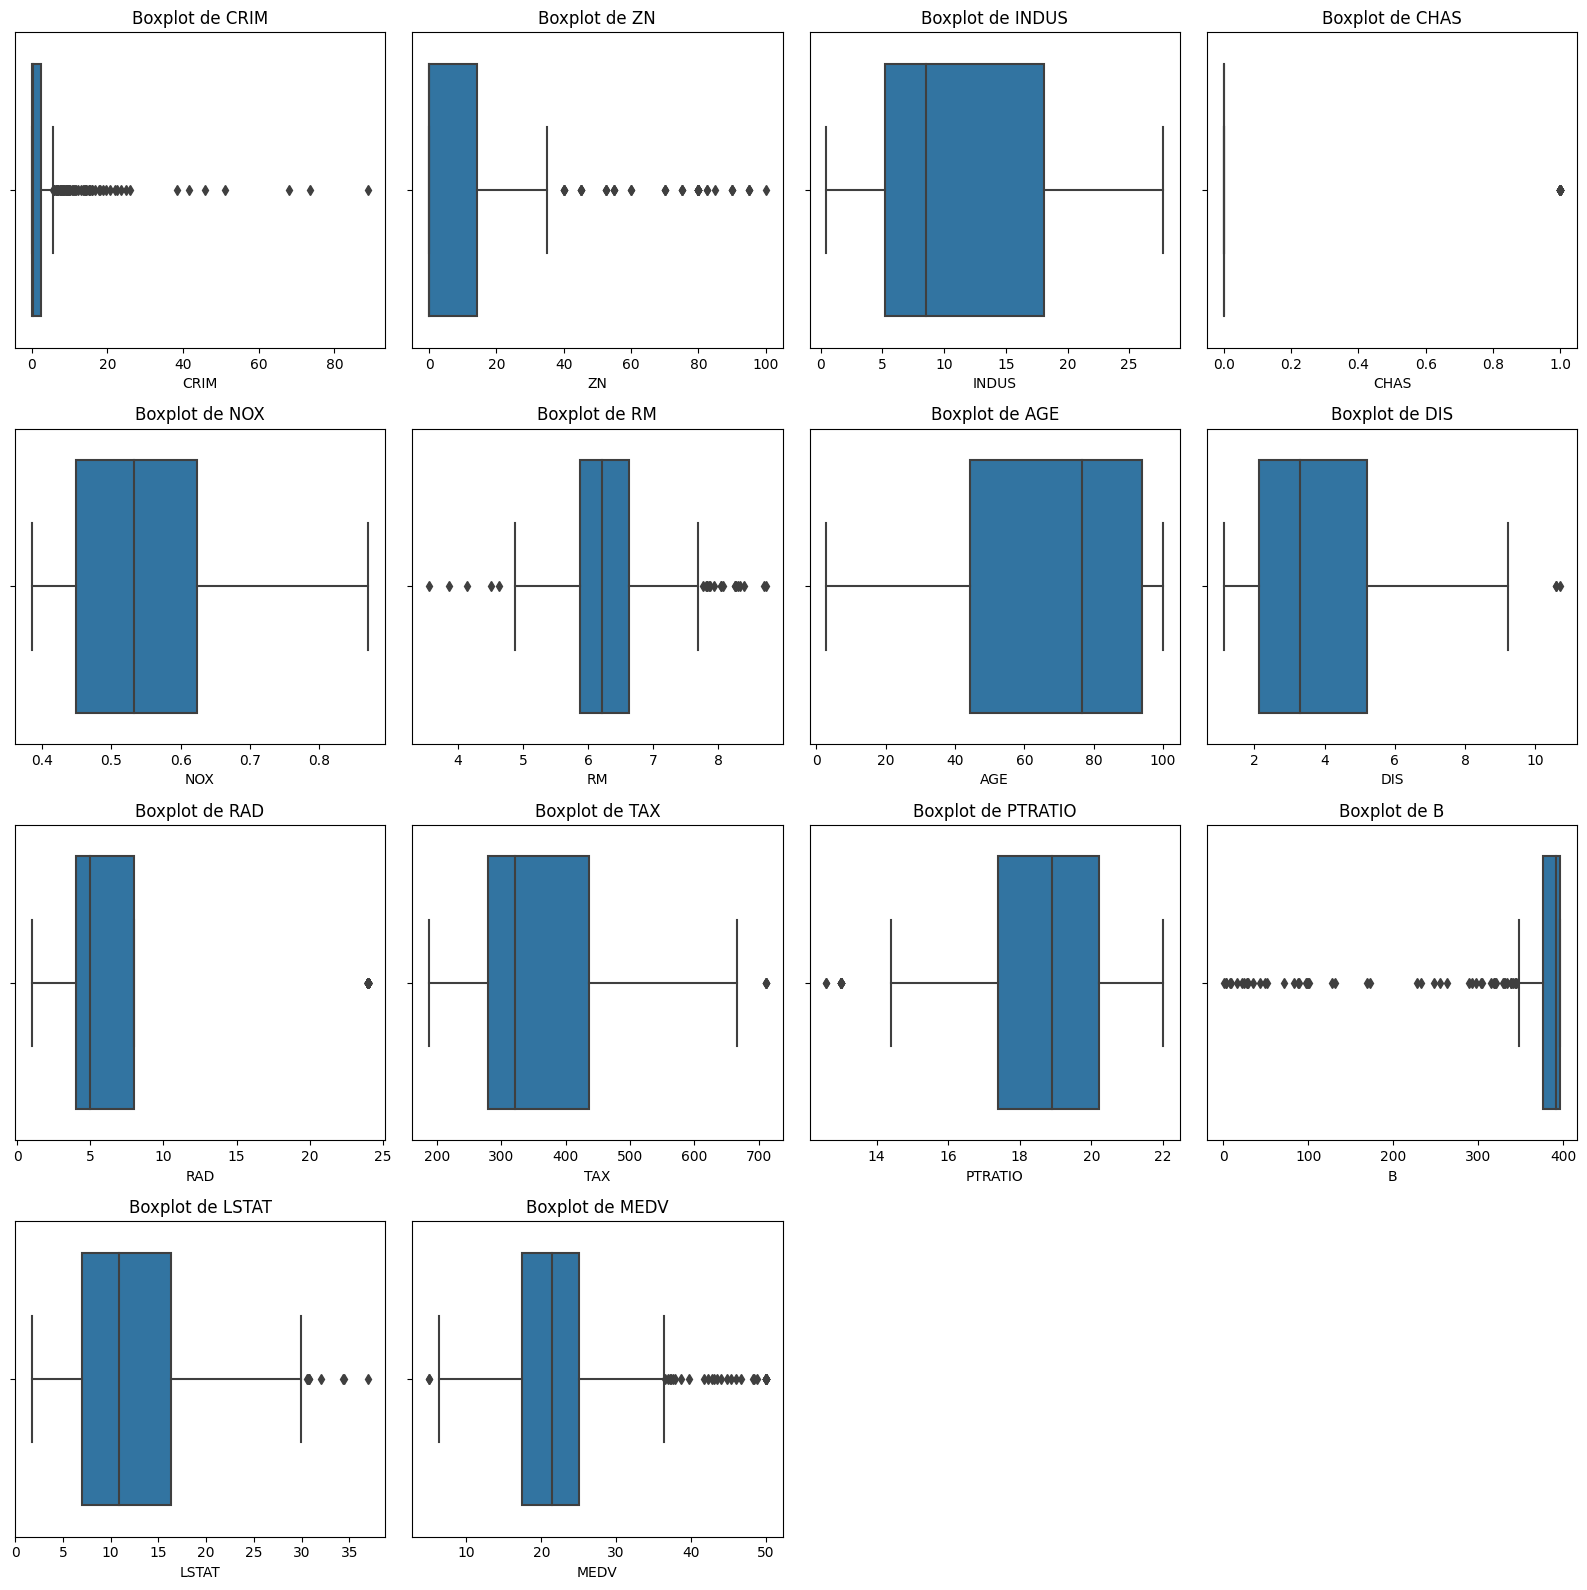

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenha a lista de variáveis do DataFrame
variaveis = train.columns

# Defina o número máximo de gráficos por linha
max_graficos_por_linha = 4

# Calcule o número total de linhas necessárias
num_linhas = len(variaveis) // max_graficos_por_linha + (len(variaveis) % max_graficos_por_linha > 0)

# Crie uma figura com subplots
fig, axs = plt.subplots(num_linhas, max_graficos_por_linha, figsize=(16, 4 * num_linhas))

# Flatten a matriz de eixos para facilitar o acesso aos subplots
axs = axs.flatten()

# Itere pelas variáveis e crie um gráfico de caixa para cada uma
for i, variavel in enumerate(variaveis):
    ax = axs[i]
    sns.boxplot(data=train, x=variavel, ax=ax)
    ax.set_title(f'Boxplot de {variavel}')
    
# Remova subplots não utilizados (se houver)
for i in range(len(variaveis), num_linhas * max_graficos_por_linha):
    fig.delaxes(axs[i])

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

## Etapa3

* Preparação dos dados:
1. Seleção.
2. Limpeza.
3. Construção.
4. Integração Formatação.

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

colunas = ['CRIM','ZN','RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for item in colunas:

    train[item] = scaler.fit_transform(train[[item]])
    test[item] = scaler.fit_transform(test[[item]])

train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.330739,-0.492161,6.20,0.0,0.504,0.366134,21.4,-0.211781,-0.129095,-0.561553,-0.476735,0.219427,-1.243059,31.5
1,-0.374165,-0.492161,13.92,0.0,0.437,0.361829,51.0,1.052115,-0.608676,-0.671760,-1.123667,0.367198,-0.720292,27.1
2,1.394648,-0.492161,18.10,0.0,0.679,-0.575169,95.4,-0.928231,1.789228,1.636467,0.817129,-4.182523,1.727926,8.3
3,-0.368343,-0.492161,27.74,0.0,0.609,-0.450332,98.8,-0.948519,-0.608676,1.911985,0.770920,0.334833,0.817765,13.6
4,7.848552,-0.492161,18.10,0.0,0.679,-0.487640,100.0,-0.980540,1.789228,1.636467,0.817129,-4.078930,1.184997,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.139018,-0.492161,19.58,0.0,0.871,-0.959726,100.0,-1.120359,-0.488781,0.026218,-1.724390,-2.273783,0.613266,15.6
400,-0.375276,2.944510,3.37,0.0,0.398,-0.731575,31.1,1.370423,-0.608676,-0.377875,-1.077458,0.415038,-0.309856,19.4
401,-0.375073,-0.492161,13.89,1.0,0.550,-0.586649,56.0,-0.340355,-0.488781,-0.751354,-0.938830,0.366608,0.161066,23.3
402,0.212135,-0.492161,18.10,0.0,0.700,-0.352758,82.5,-0.802002,1.789228,1.636467,0.817129,0.196275,0.917133,23.2


In [102]:
list(train.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

## Etapa4

1. tecnica.
2. Desgn de teste.
3. Construção do modelo.
4. Avaliação.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

models = [

]